In [278]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Crea la grid
N=300 #cantidad de puntos espaciales
xp=np.linspace(-15 ,15 ,N)
yp=np.linspace(-15 ,15 ,N)
dx=abs(xp[1]-xp[0])
dy=abs(yp[1]-yp[0])


c=1 #velocidad de propagacion
dt= 0.5*(dx/c)*0.8 #unidad de tiempo con condiciones de estabilidad
time=5000 #cantidad de puntos de tiempo necesarios para que t=60 -->time=60/dt
#como dx=dy se puede definir un gamma
gamma=(c*dt/dx)

xx, yy= np.meshgrid(xp,yp)

#CONDICIONES INICIALES
#La perturbacion inicial queda en 1/3 de un lado y comienza con 0.5, hay una barrera a 1/3 del lado opuesto con un hueco
#en los bordes y la barrera el potencial siempre es 0 y en t=0 u es 0 en todas partes menos en la perturbacion
#La solucion u va a depender de t,x
#velocidad en t=0 es 0

u0=np.zeros((N,N)) #array sin inicializar
#masked=np.zeros((N,N)) # va a indicar que posiciones deben ser ignoradas
#paredes
#masked[:,0]=1
#masked[:,N-1]=1
#masked[0,:N-1]=1
#masked[N-1,:N-1]=1

#barrera
#masked[-(N/3-1),:(N/2-2)]=1
#masked[-(N/3-1),-(N/2-2):]=1

#inicializa el array
#u0=np.ma.masked_array(u0_prim, mask=masked) 
u0[190,N/2]=-0.5

print 60/dt
print 30/dt


1495.0
747.5


In [266]:
#Crea u1 usando la condición inicial sobre la derivada en t=0
u1=np.zeros((N,N))
for j in range(1, len(xp)-1): #j corresponde a x
    for k in range(1, len(yp)-1):
        u1[j,k]= 0.5*((c*dt)**2)*((u0[j+1,k]-2*u0[j,k]+u0[j-1,k])/(dx**2) + \
                (u0[j,k+1]-2*u0[j,k]+u0[j,k-1])/(dy**2))+u0[j,k]
    

In [267]:
def calculate_row(past_row, present_row, up, down):
    #past_row es la fila j de la anterio matriz
    #present_row es las fila j de la matriz actual
    #up es la fila j-1 de present y down es la fila j+1 de present
    pre_ad= np.roll(np.copy(present_row),1) #equivalente a k+1, mueve las columnas
    pre_rev= np.roll(np.copy(present_row),-1) #equivalente a k-1, mueve las columnas
    future_row=(2-4*gamma**2)*present_row + (gamma**2)*(down+up+pre_ad \
                        +pre_rev) - past_row
    return future_row


In [272]:
#evolucion temporal
def solve2(): 
    #calcula la solucion despues de cierto intervalo de tiempo con barrera
    u=np.zeros((N,N))
    past=np.copy(u0) #i-1
    present=np.copy(u1) #i
    #crea la barrera
    bar=np.zeros(N)
    zero_c=np.zeros(N)
    for i in range(1,time):
        for j in range(1, len(xp)-1): 
            bar[N/2-10:N/2+10]=present[199, N/2-10:N/2+10] #actualiza bar
            if(j==198): #pregunta si esta arriba de la barrera (2/3)*300-2
                #envia bar como la siguiente fila
                u[j,:]=calculate_row(past[j,:], present[j,:], present[j-1,:], bar)
                
                
            if(j==199): #pregunta si esta sobre la barrera
                #envia bar como la fila actual
                u[j,:]=calculate_row(past[j,:], bar, present[j-1,:], present[j+1])
                
                    
            if(j==200):
                u[j,:]=calculate_row(past[j,:], present[j,:], bar, present[j+1,:])
                      
            else:
                u[j,:]=calculate_row(past[j,:], present[j,:], present[j-1,:], present[j+1,:])
                         
        if(np.array_equal(bar, zero_c)=='False'):
            print 'no coronamos'
        present=np.copy(u)
        past=np.copy(present)
               
    return u


In [269]:
def solve1(): 
    #calcula la solucion despues de cierto intervalo de tiempo sin barrera
    u=np.zeros((N,N))
    past=np.copy(u0) #i-1
    present=np.copy(u1) #i
    #crea la barrera
    bar=np.zeros(N)
    for i in range(1,time):
        for j in range(1, len(xp)-1): 
            u[j,:]=calculate_row(past[j,:], present[j,:], present[j-1,:], present[j+1,:])
                                            
        present=np.copy(u)
        past=np.copy(present)
        
    return u



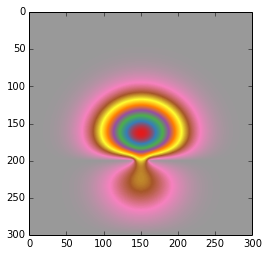

In [273]:
solution2= solve2()
plt.imshow(solution2, cmap='Set1')
plt.savefig('uf')


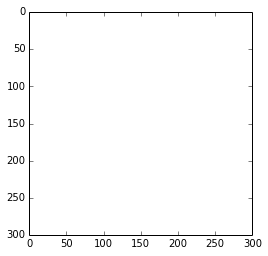

In [314]:

fig= plt.figure()
im=plt.imshow(solution2, cmap='Set1', animated ='True')
def init():
    im.set_data(([],[]))
    return [im]
def animate(i):
    im.set_array(solution2[:,i])
    return [im]

anim= animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=30, blit=False)
